Notebook to view molecules (leaves) that were unsolved. 

In [3]:
import os
import sys
import argparse

import json
import pandas as pd
import numpy as np
import requests

sys.path.append('../../../')

import Maranga.utils.parse_multismiles as mutils
import Maranga.utils.bulk_tanimoto as btan
import Maranga.scripts.fingerprints as fings
import aizynthfinder.context.scoring as scoring
import aizynthfinder.context.config as con

from aizynthfinder.analysis import ReactionTree
from rdkit.Chem import rdChemReactions, MolToSmiles
from rdkit import DataStructs
from rdkit.Chem import inchi as inch
from rdkit.ML.Cluster import Butina
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean

In [4]:
file_ext = '/data/localhost/not-backed-up/mokaya/exscientia/'

In [6]:
#convert input to list of rxns
data_e = mutils.read_hdf(file_ext+'aizynthfinder/Maranga/experiments/target_2/results/std/tg2_std_results.hdf5')
solved_data_e = data_e.loc[(data_e.is_solved==True)]
unsolved_data_e = data_e.loc[(data_e.is_solved==False)]
solved_trees_e = mutils.collect_trees(solved_data_e)
unsolved_trees_e = mutils.collect_trees(unsolved_data_e)

In [7]:
# flatten molecules to list of reactions.
def flatten(mols):
    l = []
    for i in mols:
        l.extend(i)
    return l

In [8]:
s_trees_e = flatten(solved_trees_e)
u_trees_e = flatten(unsolved_trees_e)

In [9]:
# generate reaction tree objects for solved and unsolved reactions
s_reaction_trees = [ReactionTree.from_dict(i) for i in s_trees_e]
u_reaction_trees = [ReactionTree.from_dict(i) for i in u_trees_e]

In [10]:
gen = [list(i.leafs()) for i in u_reaction_trees]
mol_flat = flatten(gen)

inchis = [i.inchi for i in mol_flat]

In [11]:
print(inchis)

['InChI=1S/CH2O/c1-2/h1H2', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C17H15Cl2N3O2S/c18-11-3-4-13-12(10-11)15(16(23)22-5-1-2-14(22)25-13)20-6-8-21(9-7-20)17(19)24/h1-5,10,15H,6-9H2/t15-/m1/s1', 'InChI=1S/CH3I/c1-2/h1H3', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C3Cl6O3/c4-2(5,6)11-1(10)12-3(7,8)9', 'InChI=1S/C4H10O/c1-4(2,3)5/h5H,1-3H3', 'InChI=1S/C17H15Cl2N3O2S/c

In [12]:
def convertInchiToSmiles(inchi):
    mol = inch.MolFromInchi(inchi)
    return MolToSmiles(mol)

In [13]:
smiles = [convertInchiToSmiles(i) for i in inchis]

In [14]:
sims = btan.bulk_tanimoto(smiles)

Number of molecules:  1156


### Plot Bulk Tanimoto Similaritiy

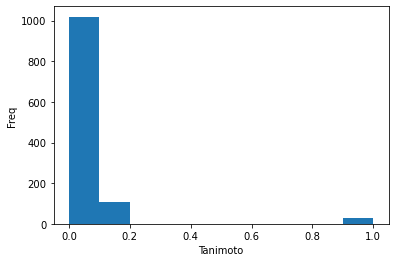

In [15]:
#plot HIST of largest similarity

%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(sims)
#plt.hist(largest)
plt.xlabel('Tanimoto')
plt.ylabel('Freq')
#plt.ylim(0,100)
plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/images/tg1_exp_failed.png')
plt.show()